# Completeness of data series

Production date: 28-Nov-2024

Produced by: Camila Trigoso (VUB)

## 🌍 Use case: Satellite water level data completeness for water resource management 

## ❓ Quality assessment question(s)
* **Are satellite water level measurements sufficiently comprehensive in terms of time and spatial coverage and completeness to be used for water resource management analysis?**

The [satellite-lake-water-level](https://cds.climate.copernicus.eu/datasets/satellite-lake-water-level?tab=overview) (C3S–LWL v5.0) dataset from the Climate Data Store (CDS) contains water level information for 251 lakes around the world. It measures water level using the geoid as a reference and covers many years of data. Knowing the fluctuations of water level over long periods can be very useful for understanding how it is affected by climate patterns, seasons, climate change, and more. This, in turn, has implications for water availability for ecosystems and people that rely on the lake.

The objective of this study is to analyze the completeness of the satellite-lake-water-level dataset both temporally and spatially in the context of its usefulness for integrated water resources management (IWRM) applications. We will use Lake Titicaca as a case study. This lake is part of an endorheic hydrologic system—the Titicaca-Desaguadero-Poopó-Salar de Uyuni (TDPS)—on which a region of Peru and Bolivia depends for water.

## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
:class: note
* The dataset's temporal completeness is sufficient, capturing seasonal fluctuations, the impacts of climate patterns, and extreme events like floods and droughts, making it useful for analysis and broad IWRM applications. 

* The temporal completeness for Lake Titicaca is sufficient for analysis, with a median time step of approximately one month from 1995 to 2019. From 2020 onward, the data is more complete, with a median time step of 12 days.

* The dataset has a single value per timestamp using the geoid as a reference. This consistency in reference for measuring water levels over a long period makes it useful for IWRM applications. 

* Lake Titicaca is connected by a river to smaller lakes downstream. Once the LWL-S-v1.0 is available and data for these smaller lakes is included, a more complete analysis of the hydrological system will be possible.

```

## 📋 Methodology

The analysis and results are organised in the following steps, which are detailed in the sections below:

**[](section-1)**
 * Download all available satellite-lake-water-level data for Lake Titicaca.

**[](section-2)**
 * Calculate performance indicators related to temporal resolution: median timestep and max. timestep for different periods of time.
 * Analize temporal completeness for IWRM applications in the study case of Lake Titicaca.

**[](section-3)**
 * Analize spatial completeness for IWRM applications in the study case of Lake Titicaca.
 

## 📈 Analysis and results

(section-1)=
### 1. Request and Download Data

#### Import Packages

In [64]:
from tabulate import tabulate
import cartopy.crs as ccrs
import matplotlib.cbook
import pandas as pd
import xarray as xr
import warnings
import numpy as np
import matplotlib.pyplot as plt
from c3s_eqc_automatic_quality_control import diagnostics, download, plot, utils
import os
import seaborn as sns
os.environ["CDSAPI_RC"] = os.path.expanduser("~/trigoso_camila/.cdsapirc")
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8-notebook")

#### Set Data Request

In [2]:
collection_id = "satellite-lake-water-level"
request = {
    "variable": "all",
    "region": "southern_america",
    "lake": "titicaca",
    "version": "version_4_0",
    "format": "zip",
}
varname = "water_surface_height_above_reference_datum"

#### Download Data

In [ ]:
da = download.download_and_transform(collection_id, request)[varname].compute()

(section-2)=
### 2. Temporal Resolution Completeness

#### Performance Indicators
The performance indicators related to temporal resolution were calculated for the Titicaca Lake and compared to the results of the same indicators in the Product Quality Assessment Report (PQAR) for the dataset [[1]](https://confluence.ecmwf.int/pages/viewpage.action?pageId=428248112).

In [4]:
# Calculate time differences
time_diff = da.time.diff(dim="time")  # Time differences remain in timedelta64[ns]
median_timestep = time_diff.median().dt.days.item()  # Convert to days
max_timestep = time_diff.max().dt.days.item()        # Convert to days
timeseries_duration = (da.time[-1] - da.time[0]).dt.days.item()  # Total duration in days

# Subset for 2014 to 2023
subset_da = da.sel(time=slice("2014-01-01", "2023-12-31"))
if subset_da.size > 0:  # Ensure subset is not empty
    subset_time_diff = subset_da.time.diff(dim="time")
    subset_median_timestep = subset_time_diff.median().dt.days.item()
    subset_max_timestep = subset_time_diff.max().dt.days.item()
    subset_timeseries_duration = (subset_da.time[-1] - subset_da.time[0]).dt.days.item()
else:
    subset_median_timestep = None
    subset_max_timestep = None
    subset_timeseries_duration = None

# Print results
print("All Data:")
print(f"Median Timestep (days): {median_timestep}")
print(f"Max Timestep (days): {max_timestep}")
print(f"Timeseries Duration (years): {timeseries_duration/365}")

print("\nSubset 2014-2023:")
print(f"Median Timestep (days): {subset_median_timestep}")
print(f"Max Timestep (days): {subset_max_timestep}")

All Data:
Median Timestep (days): 28
Max Timestep (days): 142
Timeseries Duration (years): 28.5972602739726

Subset 2014-2023:
Median Timestep (days): 14
Max Timestep (days): 93


The integer part of the results are the same as the ones presented in the Report. 

In [ ]:
# Resample to monthly frequency and count non-NaN values
monthly_counts = da.resample(time="M").count()

# Convert to Pandas for easier plotting
monthly_counts_pd = monthly_counts.to_pandas()

# Plot as bars
plt.figure(figsize=(15, 6))
monthly_counts_pd.plot(kind='bar', color='skyblue', width=0.8)
plt.title("Number of Available Values Each Month")
plt.xlabel("Time")
plt.ylabel("Count of Available Values")

# Customize the x-axis labels to show only years
xticks_positions = range(0, len(monthly_counts_pd), 12)  # Tick at the start of each year
xticks_labels = monthly_counts_pd.index[::12].strftime('%Y')  # Format as year

plt.xticks(ticks=xticks_positions, labels=xticks_labels, rotation=45)
plt.tight_layout()
plt.savefig("values_per_month.png", dpi=300)
plt.show()

```{figure} attachment:674e26e5-762c-42ae-9ee4-a09e7195cc8e.png
---
height: 200px
---
Figure 1: Count of values available in the CDS water level dataset per month over time.
```
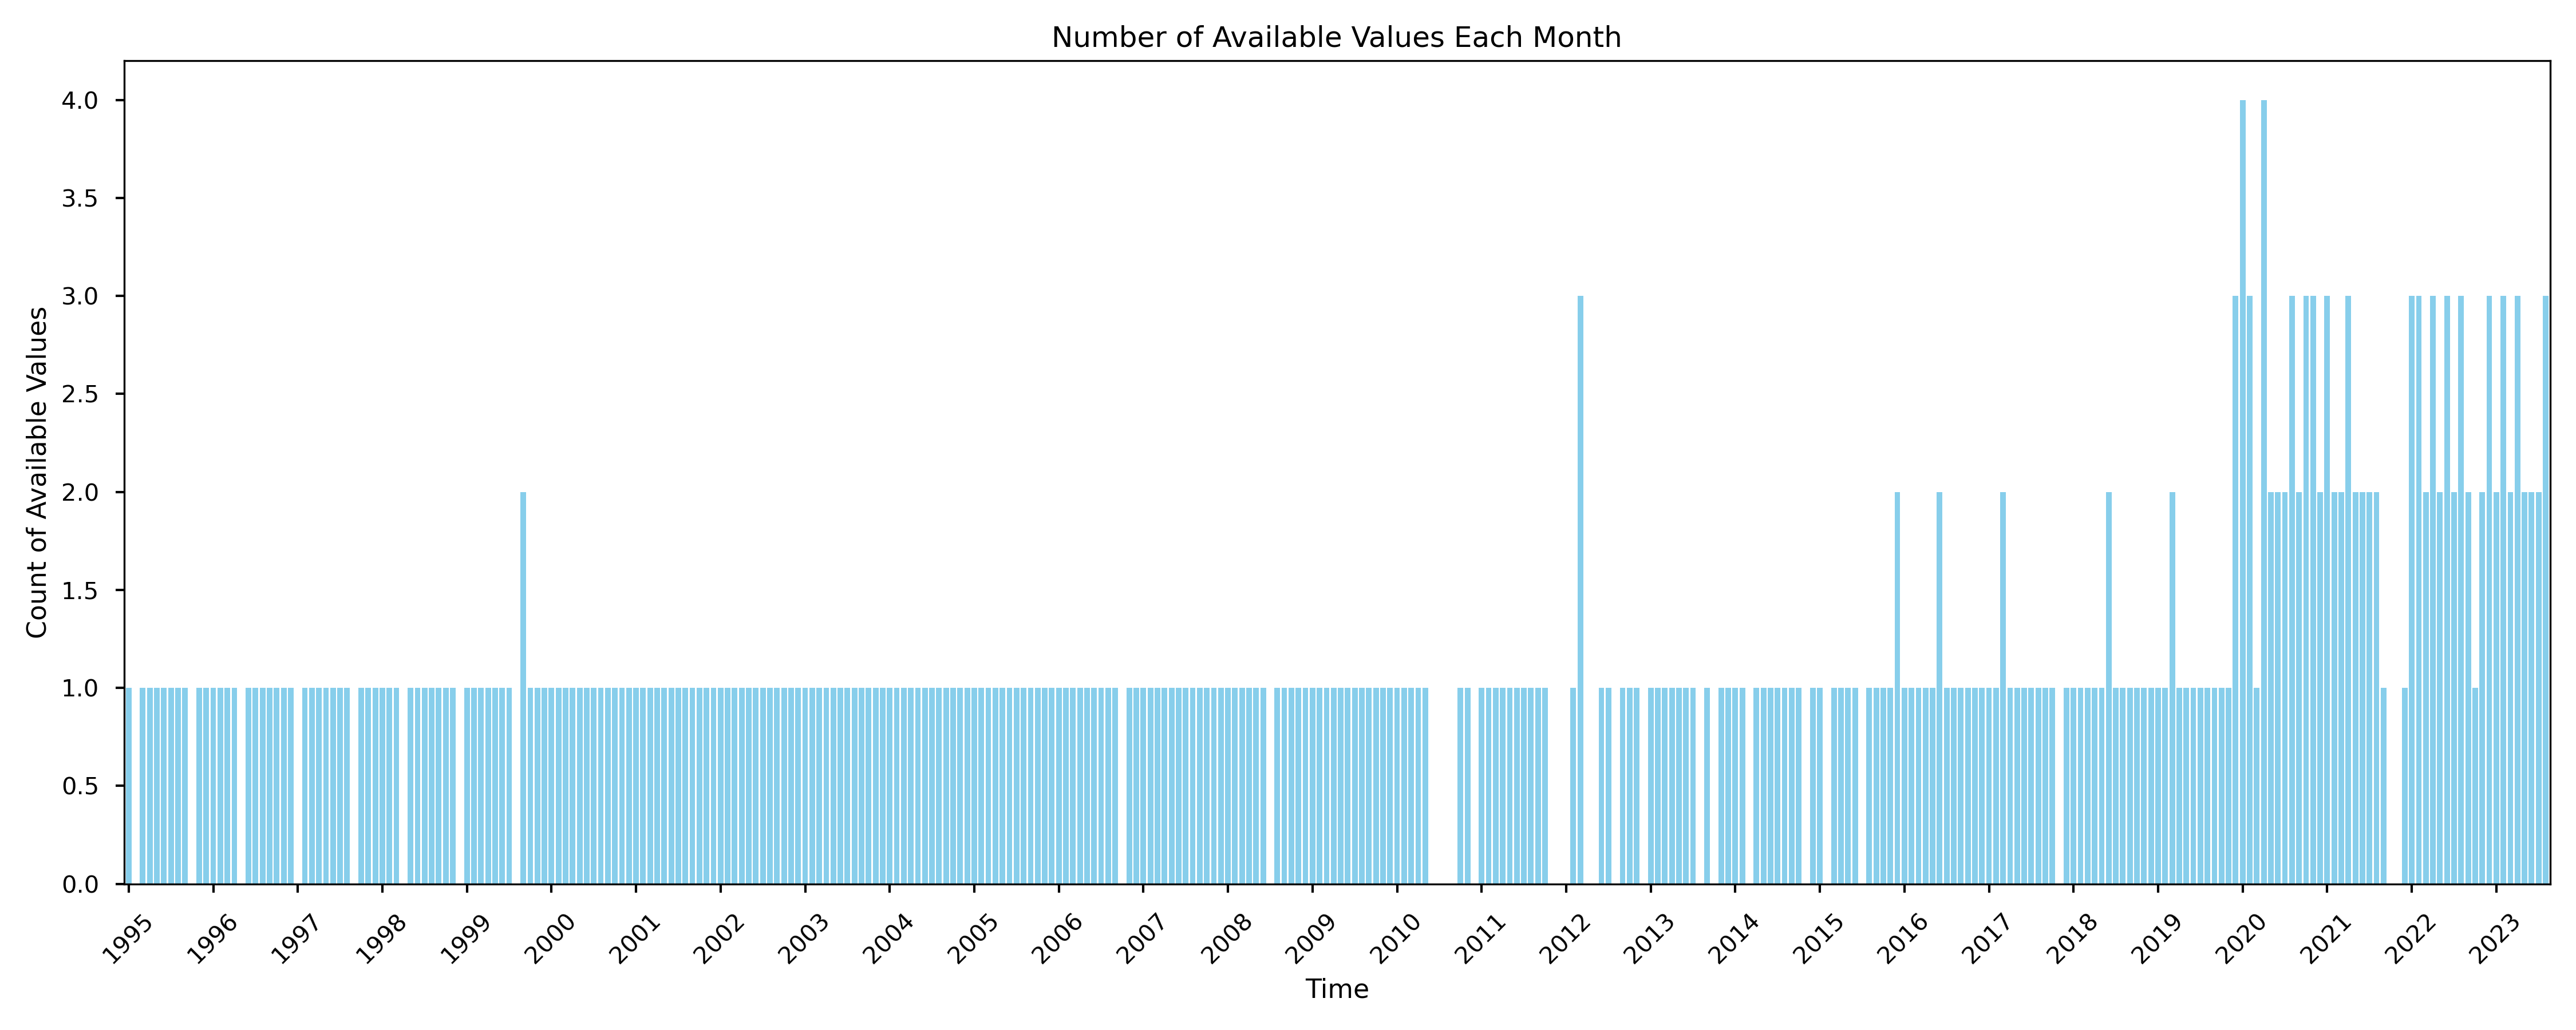

In [87]:
# Calculate time differences
time_diff = da.time.diff(dim="time")  # Time differences remain in timedelta64[ns]
median_timestep = time_diff.median().dt.days.item()  # Convert to days
max_timestep = time_diff.max().dt.days.item()        # Convert to days
timeseries_duration = (da.time[-1] - da.time[0]).dt.days.item()  # Total duration in days

# Subset for 2014 to 2023
subset_da = da.sel(time=slice("1995-01-01", "2019-12-31"))
if subset_da.size > 0:  # Ensure subset is not empty
    subset_time_diff = subset_da.time.diff(dim="time")
    subset_median_timestep = subset_time_diff.median().dt.days.item()
    subset_max_timestep = subset_time_diff.max().dt.days.item()
    subset_timeseries_duration = (subset_da.time[-1] - subset_da.time[0]).dt.days.item()
else:
    subset_median_timestep = None
    subset_max_timestep = None
    subset_timeseries_duration = None
# Print results
print("\nSubset 1995-2019:")
print(f"Median Timestep (days): {subset_median_timestep}")
print(f"Max Timestep (days): {subset_max_timestep}")

# Subset for 2014 to 2023
subset_da = da.sel(time=slice("2020-01-01", "2023-12-31"))
if subset_da.size > 0:  # Ensure subset is not empty
    subset_time_diff = subset_da.time.diff(dim="time")
    subset_median_timestep = subset_time_diff.median().dt.days.item()
    subset_max_timestep = subset_time_diff.max().dt.days.item()
    subset_timeseries_duration = (subset_da.time[-1] - subset_da.time[0]).dt.days.item()
else:
    subset_median_timestep = None
    subset_max_timestep = None
    subset_timeseries_duration = None

print("\nSubset 2020-2023:")
print(f"Median Timestep (days): {subset_median_timestep}")
print(f"Max Timestep (days): {subset_max_timestep}")


Subset 1995-2019:
Median Timestep (days): 31
Max Timestep (days): 142

Subset 2020-2023:
Median Timestep (days): 12
Max Timestep (days): 93


Figure 1 shows that for Lake Titicaca, from 1995 to 2019, there is approximately one measurement per month (median time step of 31 days). From 2020 onwards, the number of measurements per month increases to a median time step of 12 days.
Figure 1 also shows that between 2010 and 2015, there are more empty spaces, with months that do not have recorded values.

#### Load Oceanic Niño Index (ONI) Data and Preprocessing
The data was obtained from NOAA [[2]](https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php).

In [5]:
df_oni = pd.read_csv("/data/wp5/trigoso_camila/LakeWaterLevel/ONI_NOAA.csv") 
print(df_oni.head()) 

   Year  DJF  JFM  FMA  MAM  AMJ  MJJ  JJA  JAS  ASO  SON  OND  NDJ
0  1951 -0.8 -0.5 -0.2  0.2  0.4  0.6  0.7  0.9  1.0  1.2  1.0  0.8
1  1952  0.5  0.4  0.3  0.3  0.2  0.0 -0.1  0.0  0.2  0.1  0.0  0.1
2  1953  0.4  0.6  0.6  0.7  0.8  0.8  0.7  0.7  0.8  0.8  0.8  0.8
3  1954  0.8  0.5  0.0 -0.4 -0.5 -0.5 -0.6 -0.8 -0.9 -0.8 -0.7 -0.7
4  1955 -0.7 -0.6 -0.7 -0.8 -0.8 -0.7 -0.7 -0.7 -1.1 -1.4 -1.7 -1.5


In [6]:
# Reshape the data to long format
oni_long = df_oni.melt(id_vars=["Year"], 
                         var_name="Month", 
                         value_name="ONI")

# Categorize the values based on ONI thresholds
oni_long['Category'] = oni_long['ONI'].apply(lambda x: "Strong El Niño" if x >= 1.5 else ("Strong La Niña" if x <= -1.5 else "Other"))

# Filter to keep only El Niño and La Niña
events = oni_long[oni_long['Category'] != "Other"]

season_to_months = {
    'DJF': [12, 1, 2],
    'JFM': [1, 2, 3],
    'FMA': [2, 3, 4],
    'MAM': [3, 4, 5],
    'AMJ': [4, 5, 6],
    'MJJ': [5, 6, 7],
    'JJA': [6, 7, 8],
    'JAS': [7, 8, 9],
    'ASO': [8, 9, 10],
    'SON': [9, 10, 11],
    'OND': [10, 11, 12],
    'NDJ': [11, 12, 1]
}
# Expand events to include start and end months
def expand_season(row):
    months = season_to_months[row['Month']]
    year = row['Year']
    ranges = []
    for month in months:
        if month == 12:  # Adjust year for December
            ranges.append((year, month))
        elif month == 1 or month == 2:  # Adjust year for Jan, Feb in DJF
            ranges.append((year + 1, month))
        else:
            ranges.append((year, month))
    return ranges

# Expand events to include all months in the season
events_expanded = []
for _, row in events.iterrows():
    for year, month in expand_season(row):
        events_expanded.append({
            "Year": year,
            "Month": month,
            "Category": row['Category']
        })

events_expanded = pd.DataFrame(events_expanded)
common_years=[1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
 2023]
# Filter df_oni to include only the common years from da_df
events_expanded = events_expanded[events_expanded['Year'].isin(common_years)]
print(events_expanded.head()) 

    Year  Month        Category
21  1998     12  Strong El Niño
22  1999      1  Strong El Niño
23  1999      2  Strong El Niño
24  1999     12  Strong La Niña
25  2000      1  Strong La Niña


#### Plot

In [ ]:
# Compute quantiles
da_qiles = da.quantile([0.01, 0.99])

# Extract April and December data
april_values = da.sel(time=da.time.dt.month == 4)
december_values = da.sel(time=da.time.dt.month == 12)

# Convert DataArray time coordinate to a pandas datetime index
time_index = pd.to_datetime(da['time'].values)

# Plot time series
fig, ax = plt.subplots()
fig.set_dpi(150)  # Set the display DPI for the figure
da.plot(ax=ax)

# Add quantile lines with consistent color but different line styles
quantile_styles = ["--", "-."]
for qile, style in zip(da_qiles, quantile_styles):
    ax.axhline(qile, color="black", ls=style, linewidth=0.7, label=f"Quantile {qile.coords['quantile'].item():.0%}")

# Convert Year and Month in events_expanded to datetime
events_expanded['Start_Date'] = pd.to_datetime(events_expanded[['Year', 'Month']].assign(Day=1))
events_expanded['End_Date'] = events_expanded['Start_Date'] + pd.offsets.MonthEnd()

# Add shading for El Niño and La Niña periods
for _, row in events_expanded.iterrows():
    if row['Category'] == 'Strong El Niño':
        ax.axvspan(row['Start_Date'], row['End_Date'], color='red', alpha=0.1, label="Strong El Niño period")
    elif row['Category'] == 'Strong La Niña':
        ax.axvspan(row['Start_Date'], row['End_Date'], color='blue', alpha=0.1, label="Strong La Niña period")

# Add points for April and December with subtler colors
plt.scatter(april_values.time, april_values, color="orange", label="April values")
plt.scatter(december_values.time, december_values, color="lightblue", label="December values")

# Remove duplicate labels in the legend
handles, labels = ax.get_legend_handles_labels()
unique_handles_labels = dict(zip(labels, handles))  # Remove duplicates by keeping the first occurrence
ax.legend(unique_handles_labels.values(), unique_handles_labels.keys(), fontsize=9)

# Add title and save plot
plt.title(f"Lake {request['lake'].title()} water level")
plt.savefig("Lake_water_level_plot.png", dpi=300)  # Save with high DPI



```{figure} attachment:bffde9d3-e628-45f5-ba97-2f3a78d5c728.png
---
height: 300px
---
Figure 2: Water level in the Titicaca Lake in the period 1995-2023 according to the CDS dataset.
```
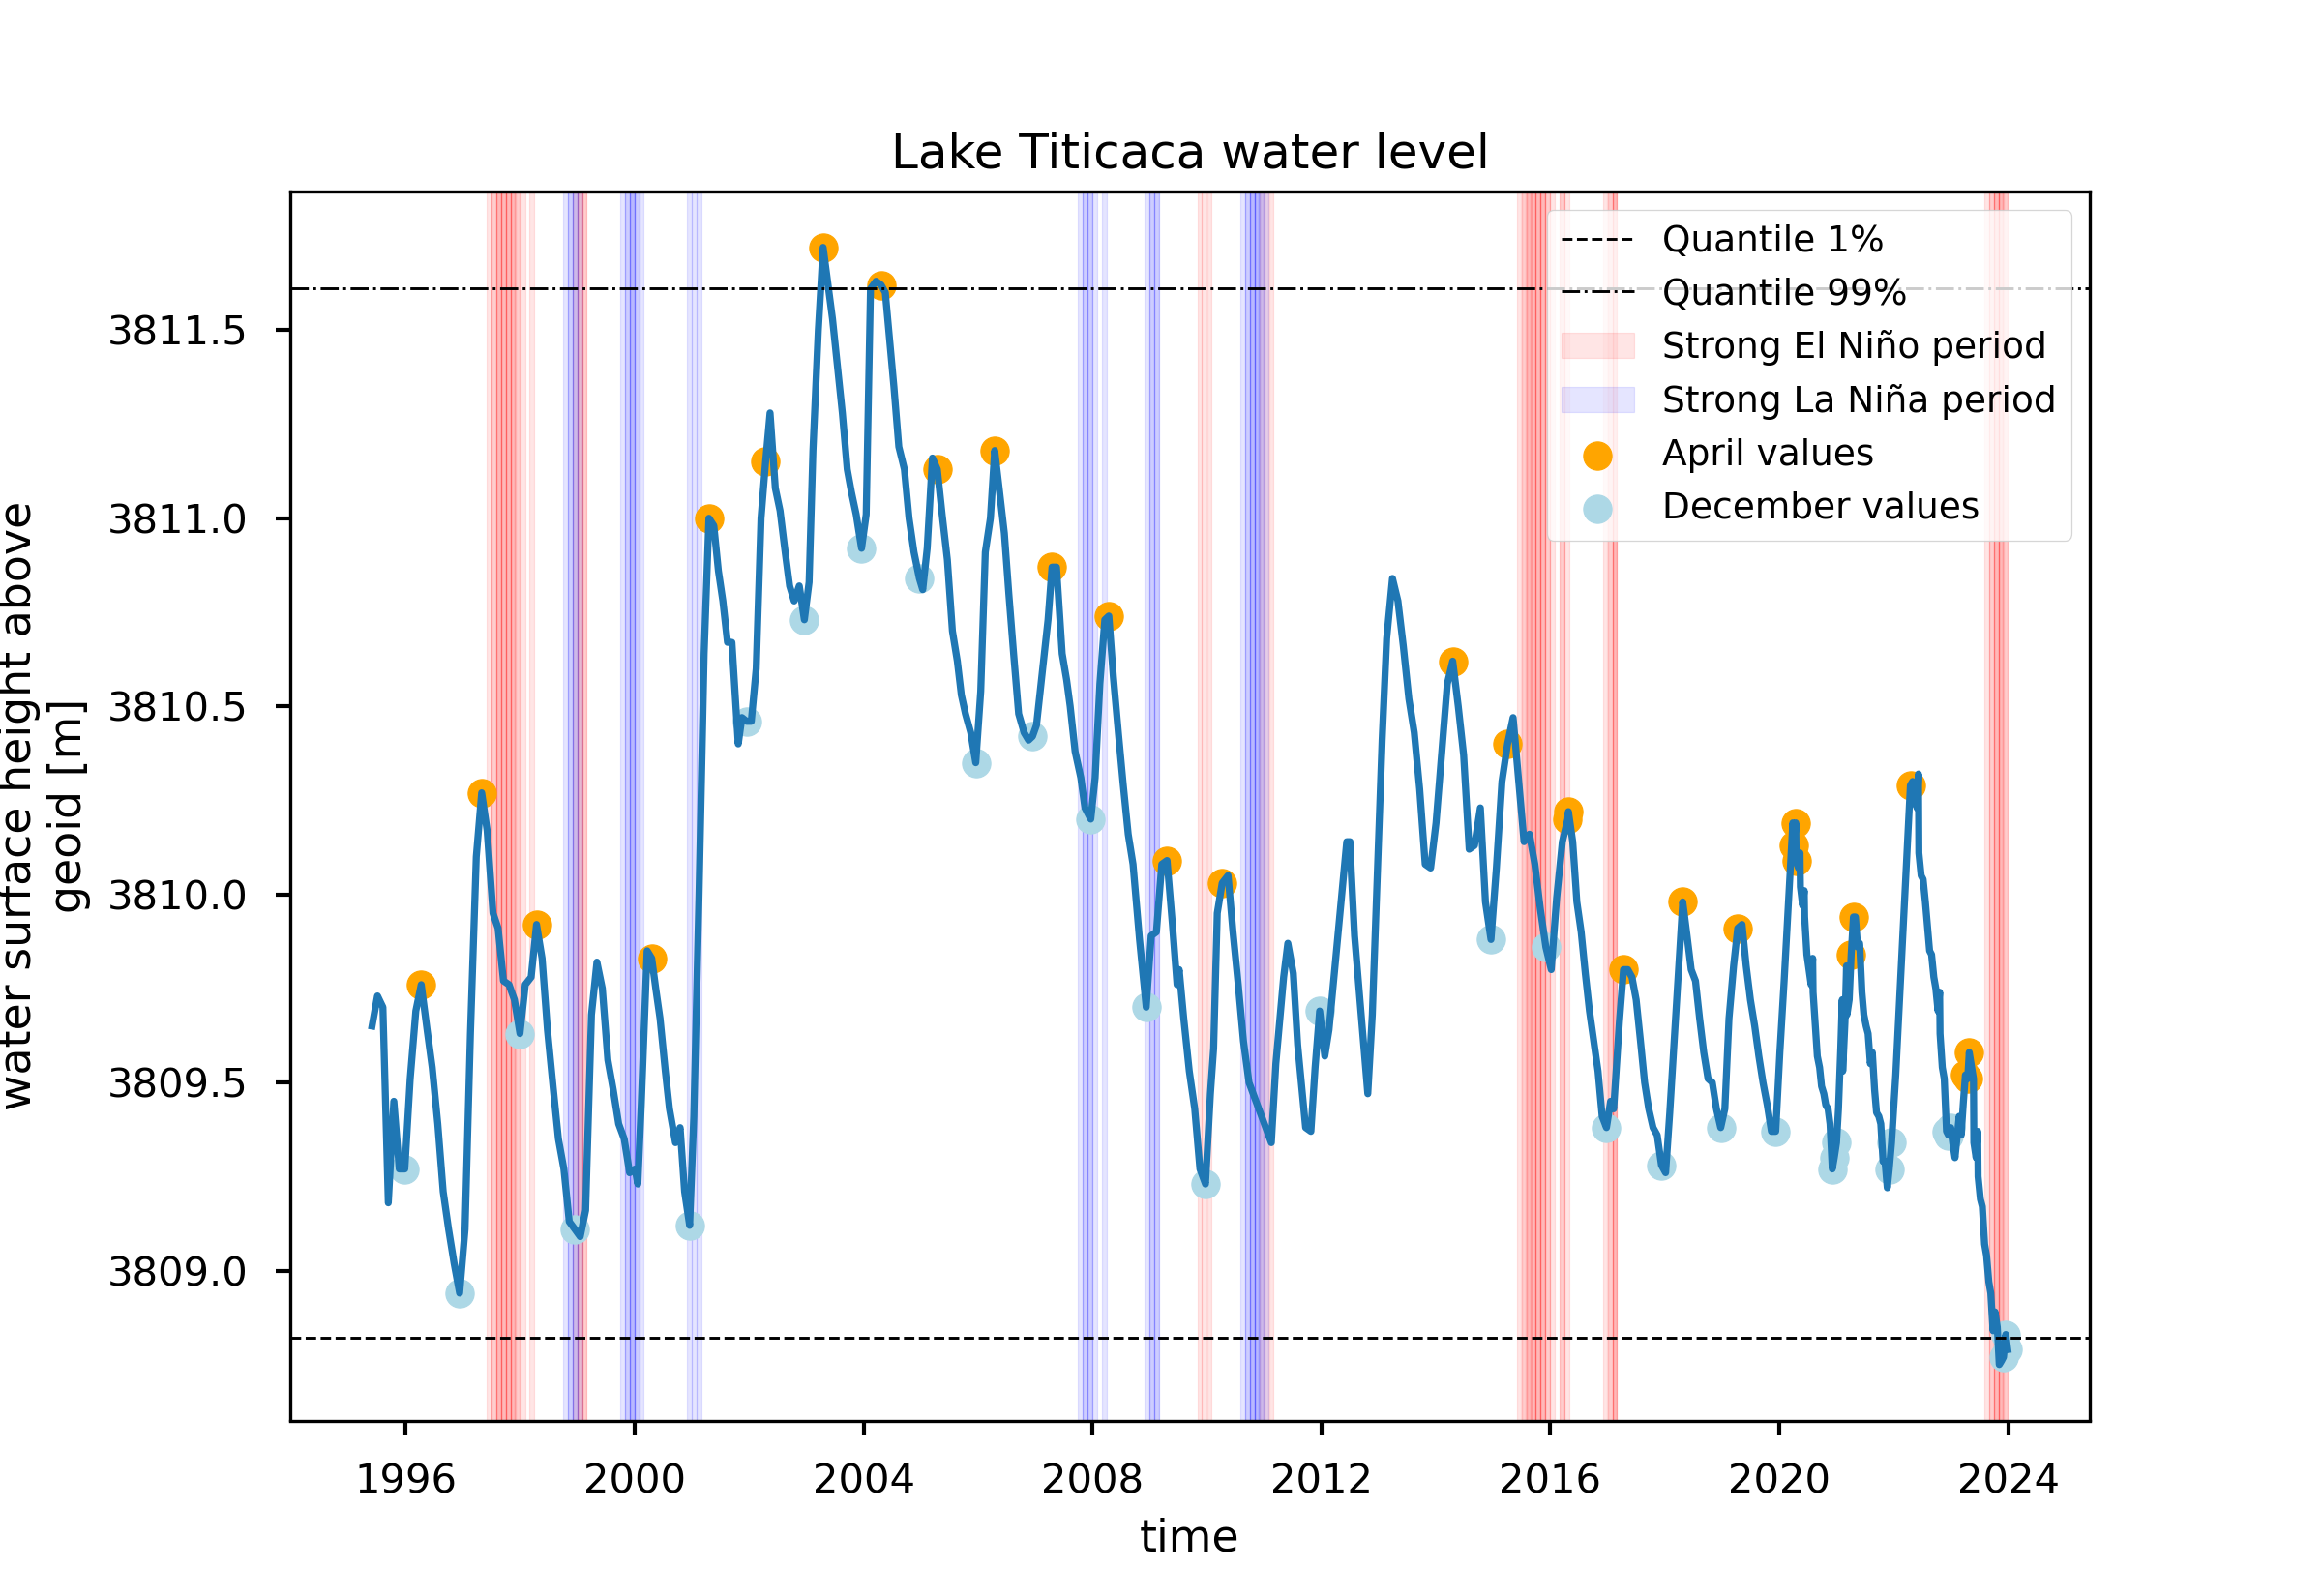

#### Analysis

Figure 2 shows that the satellite-lake-water-level dataset captures the annual fluctuations between the dry and wet seasons. The lowest water levels typically occur in December, marking the end of the dry season, while the highest water levels are generally observed in April, coinciding with the end of the wet season. The water level of Lake Titicaca is also influenced by the El Niño–Southern Oscillation (ENSO), albeit with a lagged response. Strong La Niña events lead to increased precipitation and subsequently higher water levels after the lag, whereas El Niño events have the opposite effect, causing reduced precipitation and lower water levels. El Niño also leads to warmer temperatures in the region leading to more evaporation and therefore a decrease in water levels [[3]](https://sciforum.net/manuscripts/4845/manuscript.pdf). The dataset successfully captures these trends, which are important for understanding water availability downstream in the Hydrological System of Titicaca-Desaguadero-Poopó-Salar de Uyuni (TDPS). It also records significant events, such as the flood of 2003 and the strong El Niño that contributed to historically low lake levels in 2023-2024.

The temporal completeness of the dataset makes it a valuable tool for informing Integrated Water Resources Management (IWRM) decisions. By capturing long-term trends and patterns, it provides a historical context for extreme events, insights into the impacts of climatic trends on the region, and critical information for agriculture in downstream areas that depend on rivers fed by Lake Titicaca.

(section-3)=
### 3. Spatial Resolution Completeness

In [66]:
print(da.coords)

Coordinates:
  * time     (time) datetime64[ns] 3kB 1995-05-31T15:24:59.999427840 ... 2023...


The dataset contains only a time coordinate, with one water level value for Lake Titicaca at each timestamp. The water level is measured using the geoid as a reference. Lake Titicaca is shared by Bolivia and Peru. Each country has its own measurement stations, and both measure meters above mean sea level. However, they use slightly different references, leading to a difference of 1.276 meters in their reference points (Jigena, B., et al., 2023 [[4]](https://www.researchgate.net/publication/371900707_Monitoring_Variations_of_the_water_level_on_the_Titicaca_Lake_using_in-situ_acquired_data)). Therefore, it is valuable to have a long-term database with water levels measured from the same reference geoid level and using the same technique.

#### Analysis

```{figure} attachment:6f31f31f-3bb2-4a94-90b5-0eec2eef8e71.jpg
---
height: 200px
---
Figure 3: a) Lakes in the C3S – LWL dataset v5.0 located in South America (23 lakes). b) Lakes in the C3S – LWL-S dataset v1.0 located in South America (504 lakes). Obatined from the Product Quality Assesment Report[[1]](https://confluence.ecmwf.int/pages/viewpage.action?pageId=428248112)
```
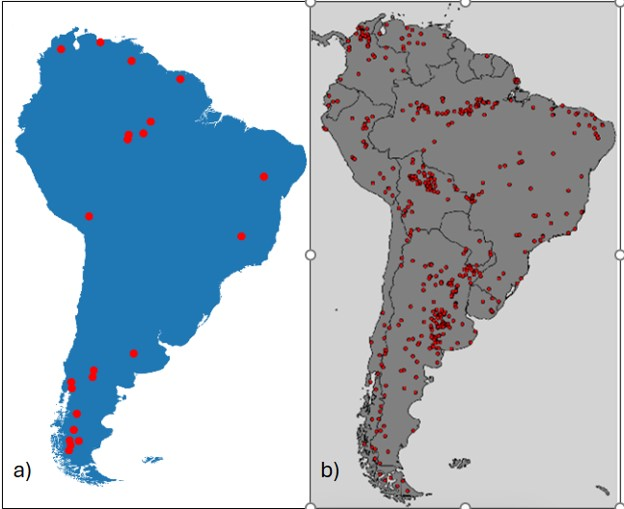

The CS3-LWL v5.0 contains information for mostly medium-sized and large lakes, while the C3S-LWL-S V1.0 also includes smaller lakes. Lake Titicaca (8,372 km²) is included in CS3-LWL v5.0, but Lake Uru Uru (214 km²) and Lake Poopó (3,191 km²) are not. These two smaller lakes will likely be covered by C3S-LWL-S V1.0 (see Figure 3), which would make this dataset a very useful tool for the comprehensive analysis of water resources in the region. These insights would be valuable for many aspects of the Integrated Water Resources Management (IWRM) of the system, such as irrigation, water quality, and ecology.

```{figure} attachment:64b0bc52-f368-4367-ad83-1f5c8294b649.jpg
---
height: 300px
---
Figure 4: Map of the Hydrologic System TDPS. Source:  Source: World Water Assessment Program (WWAP) by Association for Forest Development and Conservation (AFDC, 2002)[[[3]](https://sciforum.net/manuscripts/4845/manuscript.pdf)]
```
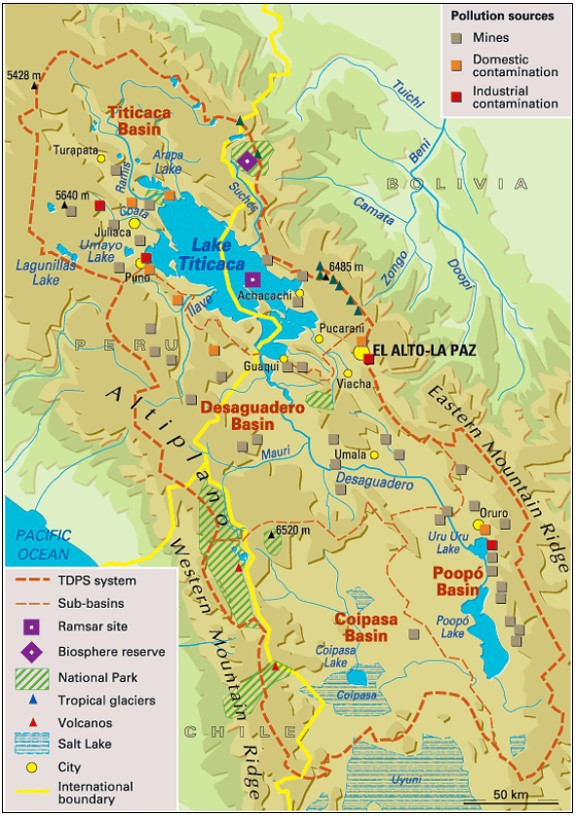

## ℹ️ If you want to know more

### Key resources

Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [BOpen](https://www.bopen.eu/)

### References

[[1]](https://confluence.ecmwf.int/pages/viewpage.action?pageId=428248112) Calmattes, B., Calassou, G., & Taburet, N. (2024). LWL v5.0 and LWL-S v1.0: Product Quality Assessment Report (PQAR). ECMWF.

[[2]](https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php) NOAA (2024). Cold & Warm Episodes by Season. National Weather Service Climate Prediction Center.

[[3]](https://sciforum.net/manuscripts/4845/manuscript.pdf) Chuchón, E., & Pereira, A. (2017). Analysis of the variability of water levels of Titicaca Lake. The 1st International Electronic Conference on Hydrological Cycle (CHyCle-2017).

[[4]](https://www.researchgate.net/publication/371900707_Monitoring_Variations_of_the_water_level_on_the_Titicaca_Lake_using_in-situ_acquired_data) Jigena, B., Romero, J., Muñoz-Pérez, J., & Howden, S. (2023). Monitoring Variations of the water level on the Titicaca Lake using in-situ acquired data. USHydro.

In [90]:
conda env export

name: wp5
channels:
  - conda-forge
dependencies:
  - _libgcc_mutex=0.1=conda_forge
  - _openmp_mutex=4.5=2_gnu
  - accessible-pygments=0.0.5=pyhd8ed1ab_0
  - affine=2.4.0=pyhd8ed1ab_0
  - aiohttp=3.9.5=py311h459d7ec_0
  - aiosignal=1.3.1=pyhd8ed1ab_0
  - alabaster=0.7.16=pyhd8ed1ab_0
  - alsa-lib=1.2.12=h4ab18f5_0
  - annotated-types=0.7.0=pyhd8ed1ab_0
  - ansicolors=1.1.8=pyhd8ed1ab_0
  - antlr-python-runtime=4.11.1=pyhd8ed1ab_0
  - anyio=4.6.0=pyhd8ed1ab_1
  - argon2-cffi=23.1.0=pyhd8ed1ab_0
  - argon2-cffi-bindings=21.2.0=py311h9ecbd09_5
  - arrow=1.3.0=pyhd8ed1ab_0
  - asciitree=0.3.3=py_2
  - asttokens=2.4.1=pyhd8ed1ab_0
  - async-lru=2.0.4=pyhd8ed1ab_0
  - attrs=24.2.0=pyh71513ae_0
  - aws-c-auth=0.7.31=h57bd9a3_0
  - aws-c-cal=0.7.4=hfd43aa1_1
  - aws-c-common=0.9.28=hb9d3cd8_0
  - aws-c-compression=0.2.19=h756ea98_1
  - aws-c-event-stream=0.4.3=h29ce20c_2
  - aws-c-http=0.8.10=h5e77a74_0
  - aws-c-io=0.14.18=h33ff4e5_10
  - aws-c-mqtt=0.10.6=h02abb05_0
  - aws-c-s3=0.6.6=h834c